In [1]:
pip install simpleaudio

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install AutoWave

In [3]:
# Importing the proper classes
from AutoWave.audio_player import AudioPlayer
from AutoWave.audio_conversion import audioConversion
from AutoWave.WaveInfo import read_file_properties
from AutoWave.augumentor import augumentOneFile,augumentFolder
from AutoWave.plotting import plotOneFile,plotMultipleFile
from AutoWave.DataLoad import gen_data_from_folder
from AutoWave.Auto_Audio_Classification import Auto_Audio_Classification

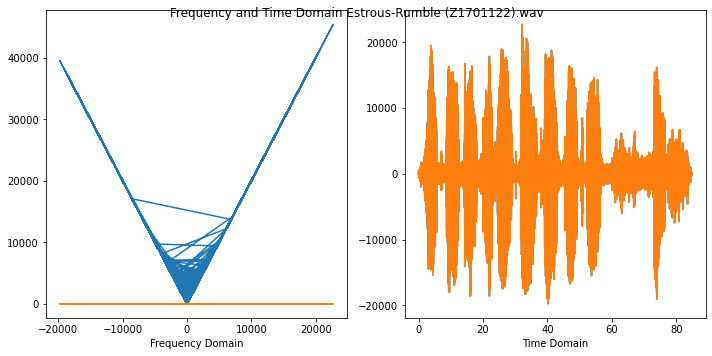

In [2]:
plotOneFile.time_freq_domain('dataset_test/Estrous-Rumble (Z1701122).wav')

In [4]:
pwd

'E:\\academic\\ganesh moodle material\\7th semester\\sc\\jcomp\\Project Implementation\\audio'

In [4]:
dataset_dir = 'Datasetele/'
data = gen_data_from_folder(dataset_dir,get_dataframe=True,label_folder=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 19.93it/s]


In [5]:
data


,File_List,Label
0,Datasetele//cat/cat_1.wav,cat
1,Datasetele//cat/cat_10.wav,cat
2,Datasetele//cat/cat_11.wav,cat
3,Datasetele//cat/cat_12.wav,cat
4,Datasetele//cat/cat_13.wav,cat
...,...,...
150,Datasetele//elephant/Squelch-_B3100649_.wav,elephant
151,Datasetele//elephant/Squelch-_C2912529_.wav,elephant
152,Datasetele//elephant/Squelch-_F1003022_.wav,elephant
153,Datasetele//elephant/Truck-Like-Call-_A2200421...,elephant


In [6]:
model = Auto_Audio_Classification(test_size=0.2,label_encoding=True,result_dataframe=False,aug_data=True)
model.fit(data)

  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

Augmentation Completed


 37%|██████████████████████████████▎                                                   | 10/27 [16:58<12:49, 45.28s/it]

Invalid Classifier(s) : LabelPropagation
Error Code: Unable to allocate 39.3 GiB for an array with shape (72600, 72600) and data type float64


 44%|███████████████████████████████████                                            | 12/27 [59:44<2:55:36, 702.45s/it]

Invalid Classifier(s) : LabelSpreading
Error Code: Unable to allocate 19.6 GiB for an array with shape (72600, 72600) and data type float32


 59%|██████████████████████████████████████████████▊                                | 16/27 [1:03:52<37:22, 203.85s/it]

Invalid Classifier(s) : NuSVC
Error Code: specified nu is infeasible


100%|███████████████████████████████████████████████████████████████████████████████| 27/27 [1:19:46<00:00, 177.28s/it]


'=================================================================='
'Best Model Sorted By Accurcy'
'=================================================================='
                            Model   Acuracy  Sensitivity  Precision   F-Score  \
0            ExtraTreesClassifier  0.617135     0.617135   0.652881  0.619430   
1          RandomForestClassifier  0.608540     0.608540   0.643371  0.611016   
2               BaggingClassifier  0.543526     0.543526   0.558604  0.544518   
3            KNeighborsClassifier  0.518237     0.518237   0.565152  0.525737   
4                   XGBClassifier  0.501598     0.501598   0.529922  0.503268   
5                  LGBMClassifier  0.449862     0.449862   0.484460  0.451189   
6          DecisionTreeClassifier  0.447769     0.447769   0.448833  0.448058   
7             ExtraTreeClassifier  0.397576     0.397576   0.398479  0.397871   
8                             SVC  0.369807     0.369807   0.436463  0.367331   
9          Calibrated

In [13]:
model

In [1]:
import pickle

In [8]:
filename = '\audio_output\finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

NameError: name 'pickle' is not defined

In [5]:
filename = './audio_output/finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [7]:
audio_file = 'dataset_test/Cadenced-Rumble (F0304820).wav'
print("Predicted Class:",str(loaded_model.predict(audio_file)))

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.87it/s]

Predicted Class: ['elephant']


In [12]:
import requests
word=str(loaded_model.predict(audio_file)[0])
if(word=='elephant'):
        
        url = "https://www.fast2sms.com/dev/bulk"
        querystring={"authorization":"WXND6A57oemvzykbV8q2QTR9BcUKYGI13ph0udZSHwgafsltxiopnbHRQuLC3jPzJc1lMasYWfdIUkTB",
                    "sender_id":"FSTSMS",
                     "message":"Elephant Detected in your region",
                     "language":"english",
                     "route":"p",
                     "numbers":"9789541978"

                    }
        #'authorization': "YOUR_AUTH_KEY",
        #'Content-Type': "application/x-www-form-urlencoded",
        headers = {

        'Cache-Control': "no-cache",
        }
        response = requests.request("GET", url, params=querystring, headers=headers)
        print(response.text)
else:
    print("No elephant present")

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.14it/s]


{"return":true,"request_id":"zndh7vsi6349byx","message":["SMS sent successfully."]}


In [3]:
CHUNK = 1024

CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 5
a=RATE / CHUNK * RECORD_SECONDS
print(a)

215.33203125


In [17]:
cd audio_output

E:\academic\ganesh moodle material\7th semester\tarp\Project Implementation\audio_output


In [13]:
import requests
import pyaudio
import wave
while True:
    CHUNK = 1024
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    RECORD_SECONDS = 1
    WAVE_OUTPUT_FILENAME = "dataset_test/Contact-Rumble (B2313850).wav"

#output.wav
    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    print("* recording")

    frames = []

    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)

    print("* done recording")

    stream.stop_stream()
    stream.close()
    p.terminate()

    wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    audio_file = WAVE_OUTPUT_FILENAME
    #print("Predicted Class:",str(loaded_model.predict(audio_file)))
    word=str(loaded_model.predict(audio_file)[0])
    if(word=='elephant'):
        
        url = "https://www.fast2sms.com/dev/bulk"
        querystring={"authorization":"WXND6A57oemvzykbV8q2QTR9BcUKYGI13ph0udZSHwgafsltxiopnbHRQuLC3jPzJc1lMasYWfdIUkTB",
                    "sender_id":"FSTSMS",
                     "message":"Elephant Detected in your region",
                     "language":"english",
                     "route":"p",
                     "numbers":"9789541978"

                    }
        #'authorization': "YOUR_AUTH_KEY",
        #'Content-Type': "application/x-www-form-urlencoded",
        headers = {

        'Cache-Control': "no-cache",
        }
        response = requests.request("GET", url, params=querystring, headers=headers)
        print(response.text)
    else:
        print("No elephant present")
            
    if 0xFF==ord('q'):
        break

* recording


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.51it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.51it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.86it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.87it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.00it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.13it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.51it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.66it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.85it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.94it/s]

* done recording


{"return":true,"request_id":"xoktqgc21mf3lws","message":["SMS sent successfully."]}
* recording


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.54it/s]

* done recording


{"return":true,"request_id":"d2vxb0jsmetaprc","message":["SMS sent successfully."]}
* recording


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.51it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.94it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.24it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.18it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.85it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.18it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.86it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.23it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.60it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.40it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.31it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.31it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.22it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.51it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.54it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.00it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.18it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.62it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.52it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.18it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.39it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.27it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.54it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.54it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.38it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.40it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.13it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.54it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.23it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.54it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.51it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.83it/s]

* done recording


{"return":true,"request_id":"jtn7h4ladis3gyx","message":["SMS sent successfully."]}
* recording


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.38it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.25it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.39it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.39it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording


{"return":true,"request_id":"12x9rne3gkymclq","message":["SMS sent successfully."]}
* recording


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.39it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.38it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.39it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.31it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.31it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.38it/s]

* done recording


{"return":true,"request_id":"m70of2dshvygp3w","message":["SMS sent successfully."]}
* recording


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.38it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.80it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.31it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.80it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.63it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.81it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.38it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.31it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.80it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.39it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.80it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.38it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.63it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording


{"return":true,"request_id":"laf863okyb7x1ns","message":["SMS sent successfully."]}
* recording


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.74it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.81it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.63it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.63it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.63it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.80it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.38it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.63it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.32it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.31it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.38it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.72it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.47it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.25it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.40it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.25it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.80it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.63it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.39it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.27it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.81it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.32it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.61it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.39it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.72it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.63it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.31it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.63it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.31it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.63it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.03it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording


{"return":true,"request_id":"h6a5fcdbl397vem","message":["SMS sent successfully."]}
* recording


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.40it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.80it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.31it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.80it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.65it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.38it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.39it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.38it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.31it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.27it/s]

* done recording
No elephant present
* recording



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.99it/s]

* done recording
No elephant present
* recording


KeyboardInterrupt: 

In [8]:
import requests
url = "https://www.fast2sms.com/dev/bulk"
querystring={"authorization":"WXND6A57oemvzykbV8q2QTR9BcUKYGI13ph0udZSHwgafsltxiopnbHRQuLC3jPzJc1lMasYWfdIUkTB",
            "sender_id":"FSTSMS",
             "message":"HI Kammu",
             "language":"english",
             "route":"p",
             "numbers":"6381286785"
             
            }
#'authorization': "YOUR_AUTH_KEY",
#'Content-Type': "application/x-www-form-urlencoded",
headers = {

'Cache-Control': "no-cache",
}
response = requests.request("GET", url, params=querystring, headers=headers)
print(response.text)

{"return":true,"request_id":"6gciofbd7rjmw3k","message":["SMS sent successfully."]}


In [26]:
pip install moviepy

In [2]:
pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6087 sha256=abcfca6b95ae584e689927e717c3541ebdd128623130d7a948c9a65c656c6041
  Stored in directory: c:\users\ganesh\appdata\local\pip\cache\wheels\30\33\46\5ab7eca55b9490dddbf3441c68a29535996270ef1ce8b9b6d7
Successfully built ffmpeg
Note: you may need to restart the kernel to use updated packages.


In [3]:
import moviepy.editor as mp

In [4]:
video = mp.VideoFileClip(r"ele.mp4")

In [5]:
video.audio.write_audiofile(r"outputforele.mp3")

chunk:   0%|                                                                         | 0/665 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in outputforele.mp3


MoviePy - Done.
